In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()  # يضبط تلقائيًا شكل الرسوميات
# إعداد عرض الأشكال والنتائج بوضوح
plt.style.use('seaborn-v0_8')

In [6]:
df = pd.read_csv("Amazon_Reviews_Cleaned.csv")

In [27]:
df.head()       # أول 5 صفوف
df.tail()       # آخر 5 صفوف
df.shape        # عدد الصفوف والأعمدة
df.info()       # أنواع الأعمدة وعدد القيم
df.describe()   # ملخص إحصائي للأعمدة الرقمية

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119961 entries, 0 to 119960
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               119961 non-null  object
 1   UserId                  119961 non-null  object
 2   ProfileName             119961 non-null  object
 3   HelpfulnessNumerator    119961 non-null  int64 
 4   HelpfulnessDenominator  119961 non-null  int64 
 5   Score                   119961 non-null  int64 
 6   Time                    119961 non-null  int64 
 7   Summary                 119653 non-null  object
 8   Text                    119961 non-null  object
 9   Sentiment               119961 non-null  object
 10  Text_Tokens             119961 non-null  object
dtypes: int64(4), object(7)
memory usage: 10.1+ MB


HelpfulnessNumerator  HelpfulnessDenominator          Score  \
count         119961.000000           119961.000000  119961.000000   
mean               1.926434                2.859188       3.060170   
std                8.341844                9.433696       1.458134   
min                0.000000                0.000000       1.000000   
25%                0.000000                0.000000       2.000000   
50%                0.000000                1.000000       3.000000   
75%                2.000000                3.000000       5.000000   
max              844.000000              923.000000       5.000000   

               Time  
count  1.199610e+05  
mean   1.299141e+09  
std    4.603084e+07  
min    9.482400e+08  
25%    1.278374e+09  
50%    1.313366e+09  
75%    1.333325e+09  
max    1.351210e+09

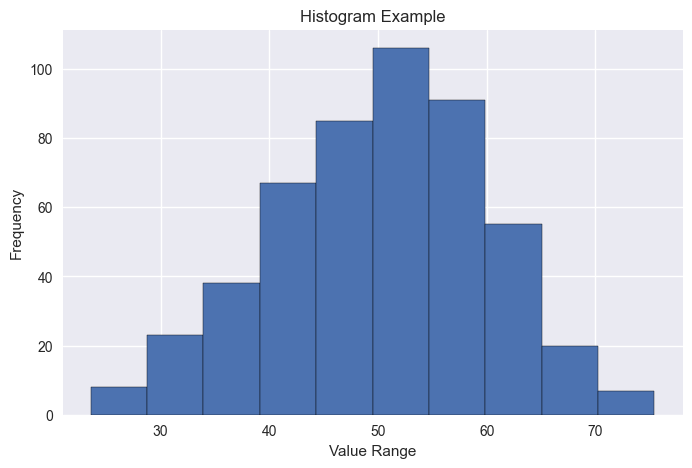

In [3]:
# Data example
data = np.random.normal(50, 10, 500)  # 500 رقم موزعين طبيعيًا كعينة

# Create histogram
plt.figure(figsize=(8,5))
plt.hist(data, bins=10, edgecolor='black')

# Labels & title
plt.title("Histogram Example")
plt.xlabel("Value Range")
plt.ylabel("Frequency")

# Show plot
plt.show()


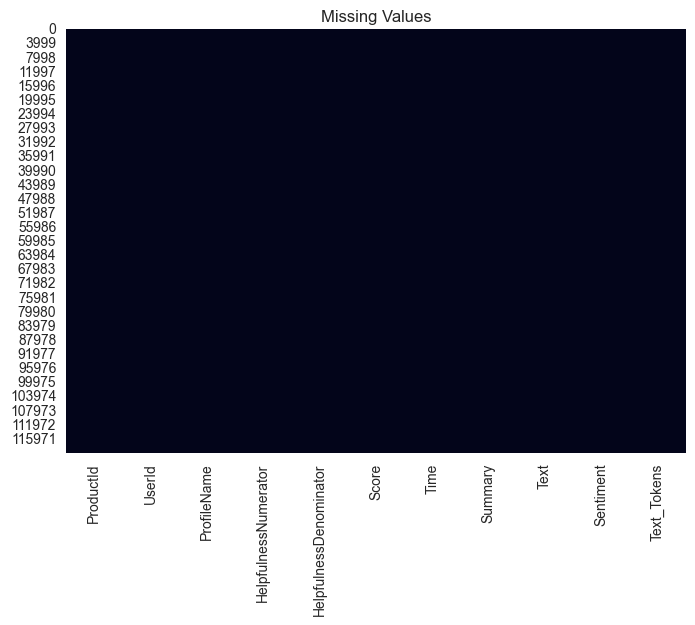

In [28]:
df.isnull().sum()      # عدد القيم المفقودة في كل عمود
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values")
plt.show()

In [33]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

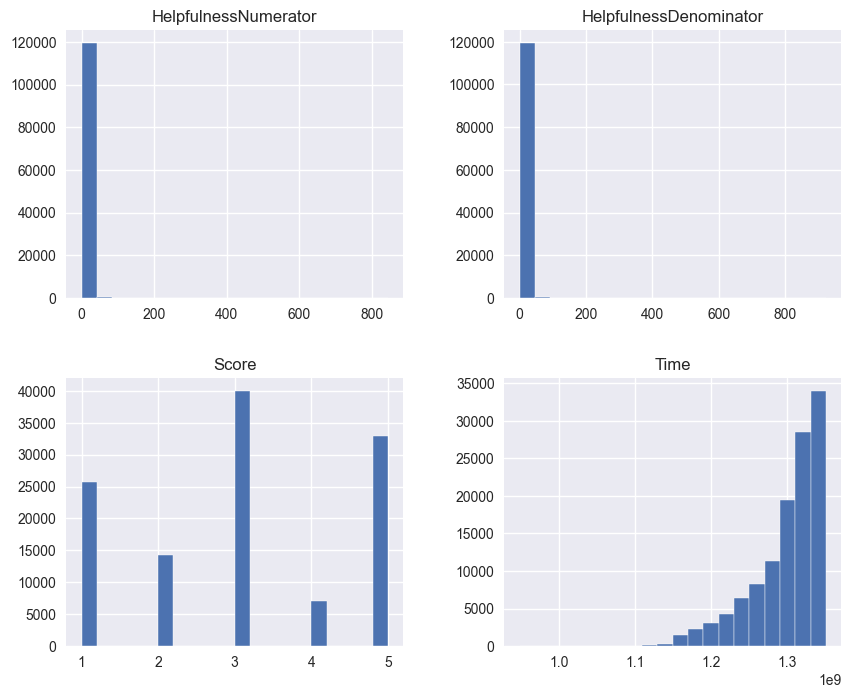

In [31]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(10, 8), bins=20)
plt.show()

<Axes: >

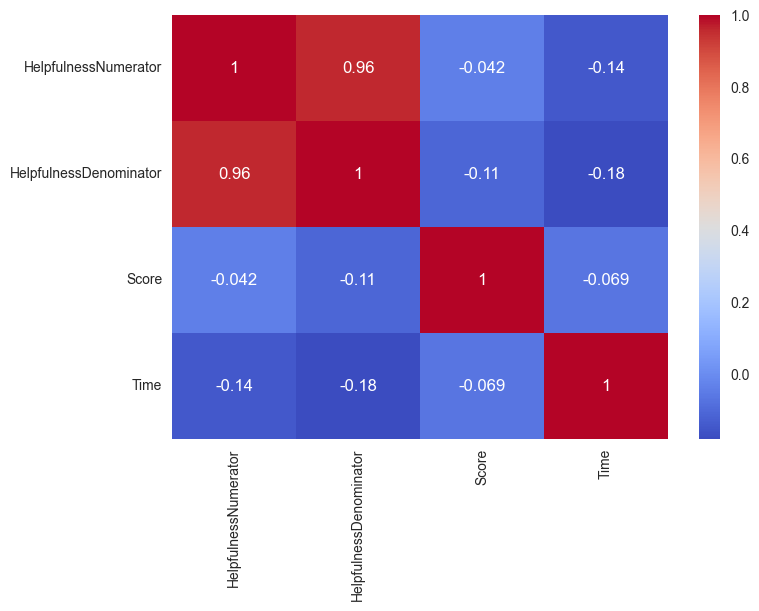

In [35]:
numeric_cols = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")

Distribution of values in the column: ProductId ---
 Top 10 values in the column:
ProductId
B000KV61FC    208
B000KV7ZGQ    205
B0041NYV8E    190
B006MONQMC    189
B002IEZJMA    185
B0090X8IPM    168
B002LANN56    167
B002IEVJRY    163
B003GTR8IO    157
B001VJ0B0I    156
Name: count, dtype: int64
Distribution of values in the column: UserId ---
 Top 10 values in the column:
UserId
A3TVZM3ZIXG8YW    95
A2SZLNSI5KOQJT    72
AKZKG2Z7CNV27     69
AY12DBB0U420B     65
A2MUGFV2TDQ47K    65
A1YUL9PCJR3JTY    64
A3OXHLG6DIBRW8    59
AY1EF0GOH80EK     53
A281NPSIMI1C2R    52
A1Z54EM24Y40LL    51
Name: count, dtype: int64
Distribution of values in the column: ProfileName ---
 Top 10 values in the column:
ProfileName
christopher hayes                             95
Chris                                         83
Linda                                         72
Carrie, "Formerly &#34;Sister Carrie&#34;"    72
BreezyPaige                                   69
Lynrie "Oh HELL no"                    

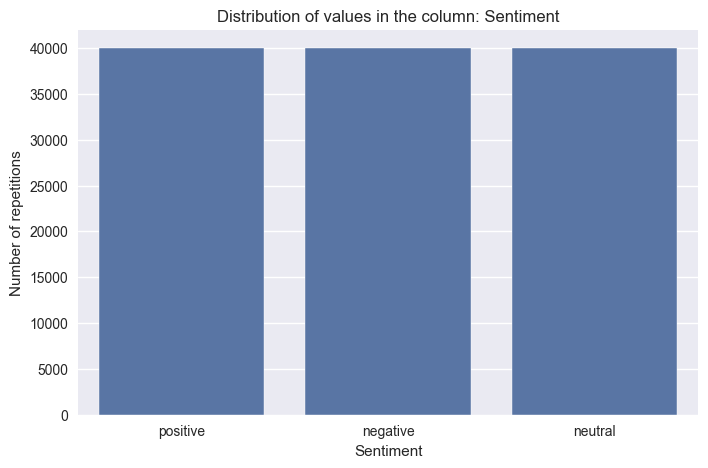

In [12]:
# تحديد الأعمدة النصية
cat_cols = ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text', 'Sentiment', 'Text_Tokens']

# الأعمدة التي لا يمكن رسم مخطط عد لها بسبب العدد الهائل للقيم الفريدة
high_cardinality_cols = ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text', 'Text_Tokens']

# 1. التكرار على كل عمود للتحليل (طباعة قيمة التكرار)
for col in cat_cols:
    print(f"Distribution of values in the column: {col} ---")
    
    if col in high_cardinality_cols:
        # عرض أهم 10 قيم فقط للأعمدة الكبيرة
        print(f" Top 10 values in the column:")
        print(df[col].value_counts().head(10))
    else:
        # طباعة كل قيم التكرار للأعمدة الصغيرة
        print(df[col].value_counts())

# 2. الرسم البياني (مخطط العد - Count Plot) للأعمدة الصغيرة فقط (مثل 'Sentiment')

# (نفترض أن 'Sentiment' هو العمود الوحيد القابل للرسم بناءً على طبيعة مجموعات البيانات المشابهة)
plot_cols = [col for col in cat_cols if col not in high_cardinality_cols]

for col in plot_cols:
    # رسم مخطط العد (Count Plot)
    plt.figure(figsize=(8, 5)) 
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of values in the column: {col}')
    plt.xlabel(col)
    plt.ylabel('Number of repetitions')
    plt.show()

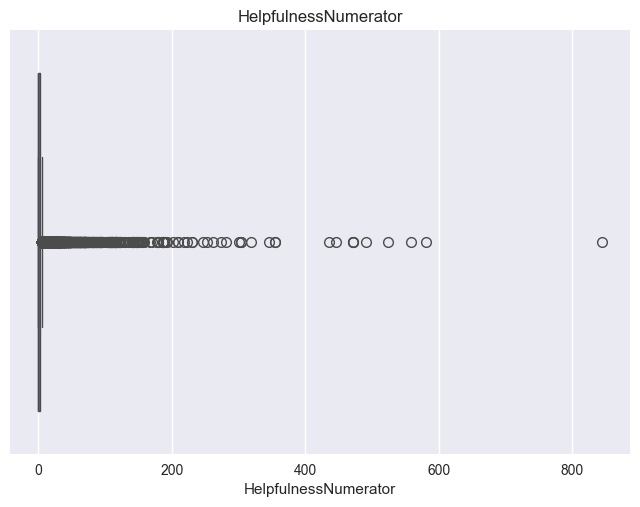

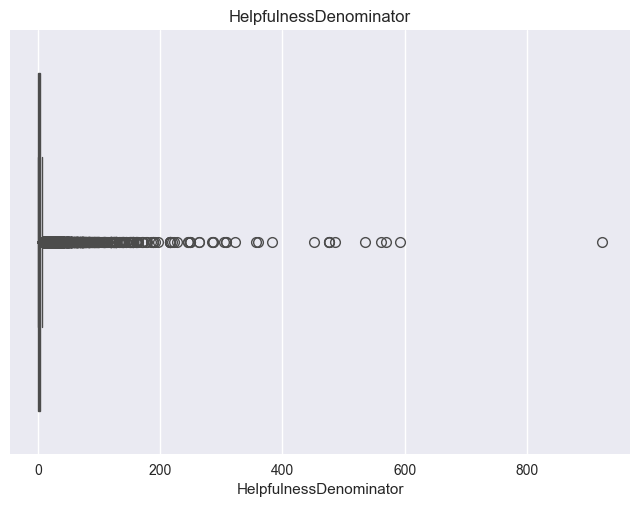

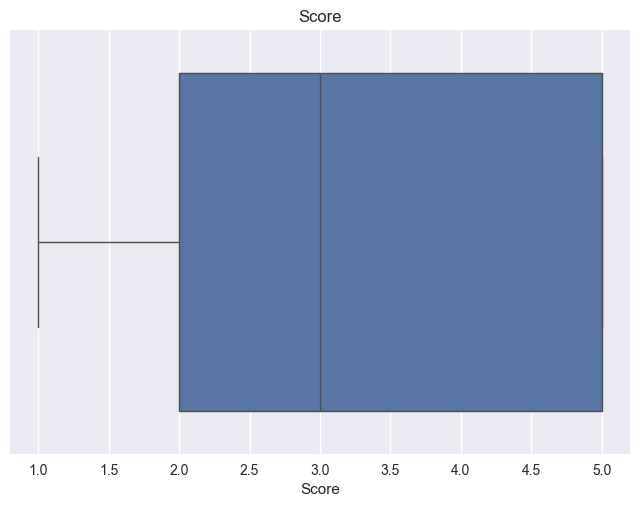

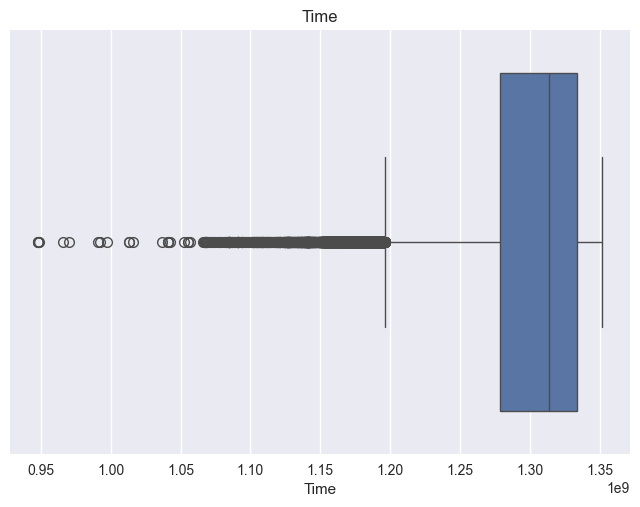

In [36]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Word Cloud for Review Texts:


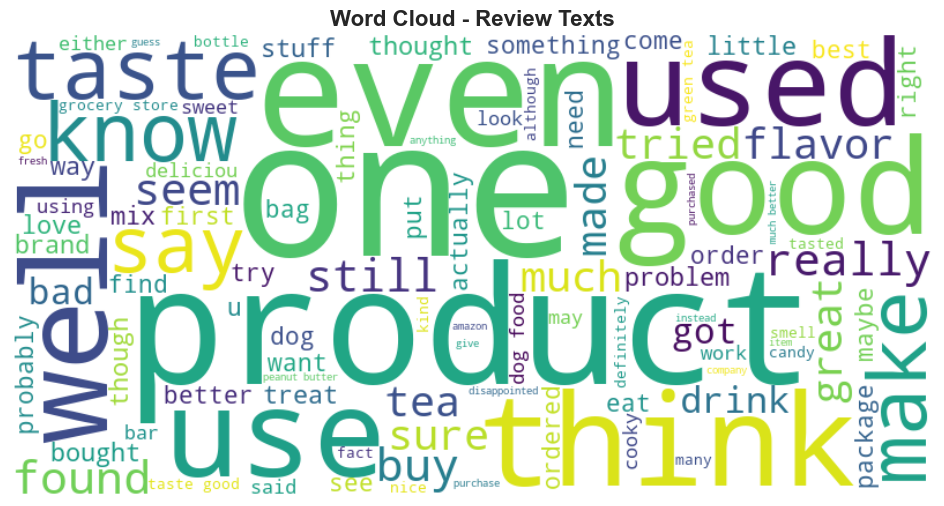

Word Cloud for Review Summaries:


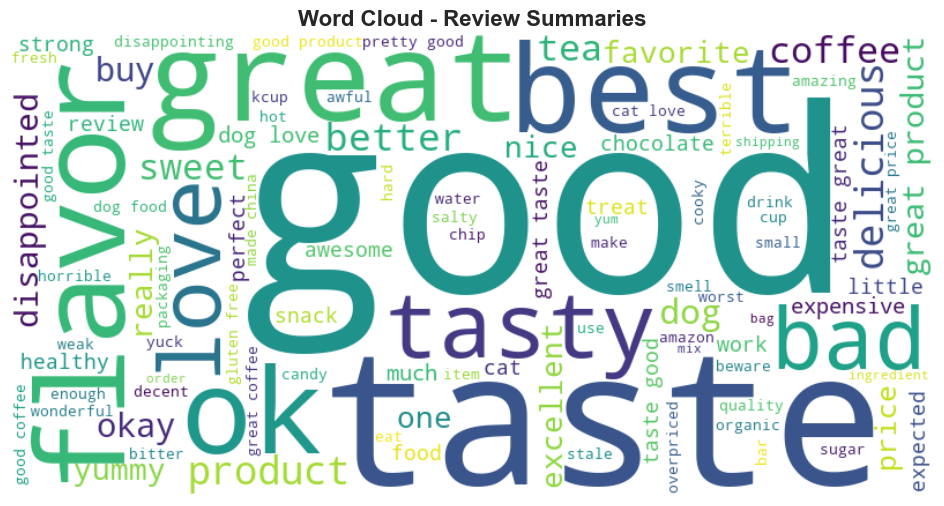

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Function to create word cloud
def create_wordcloud(text_series, title):
    # Combine all texts into one string
    all_text = ' '.join(text_series.dropna().astype(str))
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=100,
                         colormap='viridis').generate(all_text)
    
    # Display word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

# Word cloud for Text
print("Word Cloud for Review Texts:")
create_wordcloud(df['Text'], 'Word Cloud - Review Texts')

# Word cloud for Summary
print("Word Cloud for Review Summaries:")
create_wordcloud(df['Summary'], 'Word Cloud - Review Summaries')

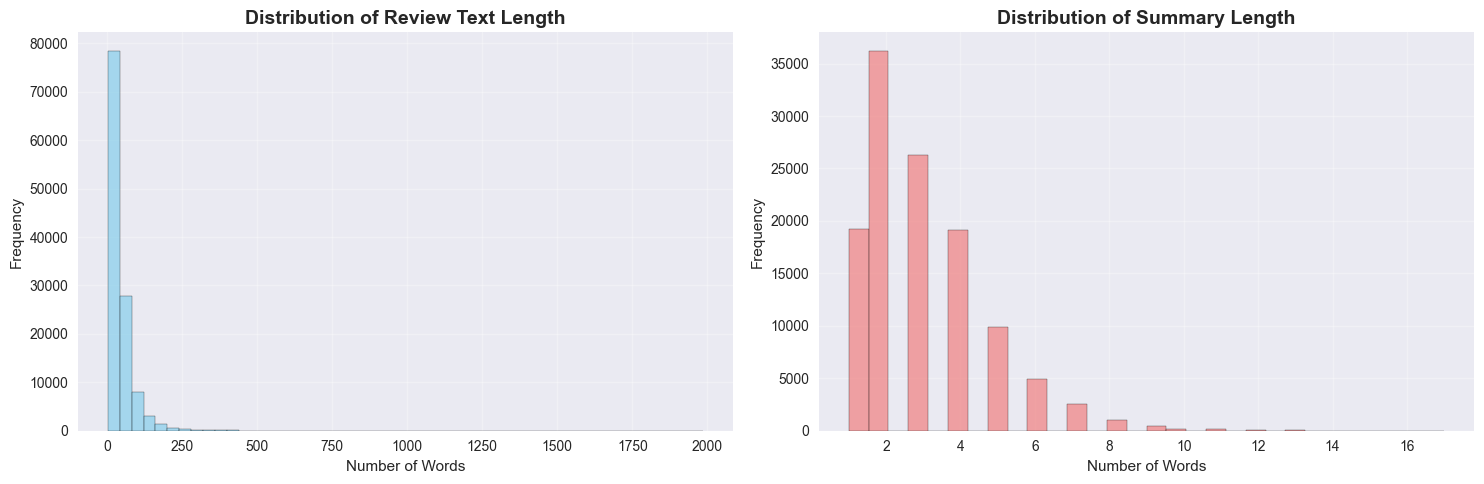

 Review Length Statistics:
 Average text length: 43.9 words
 Median: 31.0 words
 Longest review: 1986 words
 Shortest review: 3 words
 Standard deviation: 44.9

 Summary Length Statistics:
 Average summary length: 3.0 words
 Median: 3.0 words
 Longest summary: 17 words
 Shortest summary: 1 words


In [8]:
# Calculate length of each review (word count)
df['text_length'] = df['Text'].apply(lambda x: len(str(x).split()))
df['summary_length'] = df['Summary'].apply(lambda x: len(str(x).split()))

# Create histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram for main text length
axes[0].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Review Text Length', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Histogram for summary length
axes[1].hist(df['summary_length'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Summary Length', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics about lengths
print(" Review Length Statistics:")
print(f" Average text length: {df['text_length'].mean():.1f} words")
print(f" Median: {df['text_length'].median()} words")
print(f" Longest review: {df['text_length'].max()} words")
print(f" Shortest review: {df['text_length'].min()} words")
print(f" Standard deviation: {df['text_length'].std():.1f}")

print(f"\n Summary Length Statistics:")
print(f" Average summary length: {df['summary_length'].mean():.1f} words")
print(f" Median: {df['summary_length'].median()} words")
print(f" Longest summary: {df['summary_length'].max()} words")
print(f" Shortest summary: {df['summary_length'].min()} words")


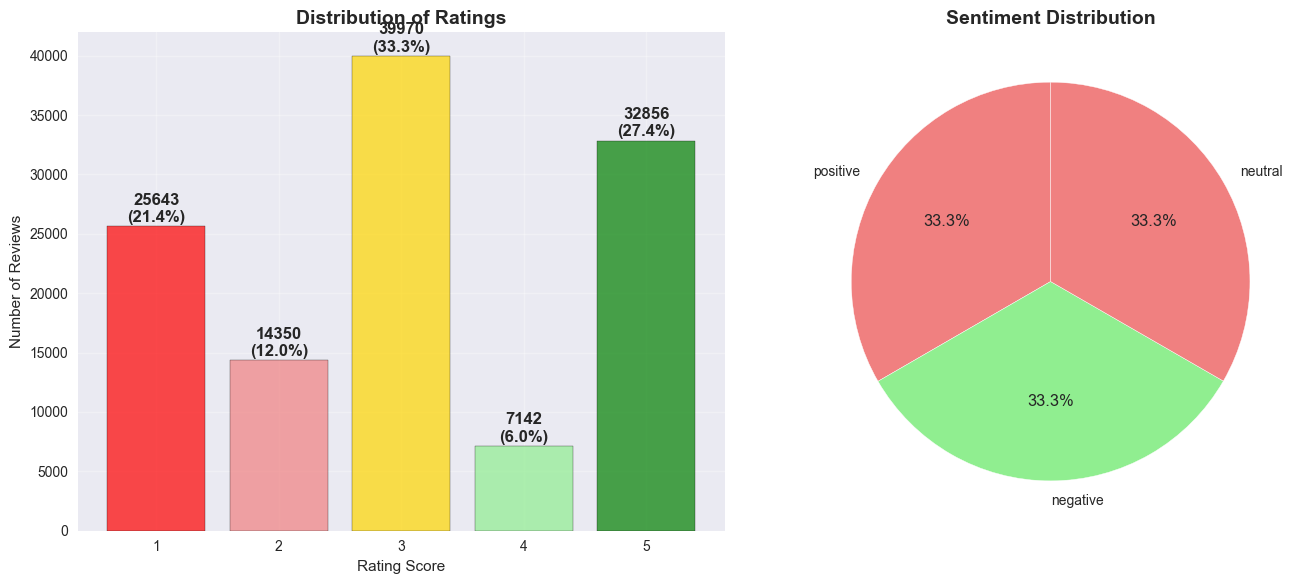

 Rating Distribution Details:
 Rating 1: 25643 reviews (21.4%)
 Rating 2: 14350 reviews (12.0%)
 Rating 3: 39970 reviews (33.3%)
 Rating 4: 7142 reviews (6.0%)
 Rating 5: 32856 reviews (27.4%)

📈 Total number of reviews: 119,961


In [11]:
# Ratings distribution
plt.figure(figsize=(14, 6))

# Bar chart for ratings
plt.subplot(1, 2, 1)
rating_counts = df['Score'].value_counts().sort_index()
colors = ['red', 'lightcoral', 'gold', 'lightgreen', 'green']
bars = plt.bar(rating_counts.index, rating_counts.values, 
               color=colors, alpha=0.7, edgecolor='black')

# Add numbers on bars
for bar, count in zip(bars, rating_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count}\n({count/len(df)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating Score')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(True, alpha=0.3)

# Sentiment distribution
plt.subplot(1, 2, 2)
sentiment_counts = df['Sentiment'].value_counts()
colors = ['lightcoral', 'lightgreen']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed statistics
print(" Rating Distribution Details:")
for score in sorted(df['Score'].unique()):
    count = len(df[df['Score'] == score])
    percentage = (count / len(df)) * 100
    print(f" Rating {score}: {count} reviews ({percentage:.1f}%)")

print(f"\n Total number of reviews: {len(df):,}")

[nltk_data] Downloading package stopwords to C:\Users\HARD
[nltk_data]     WARE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


 Most Common Words in Review Texts:


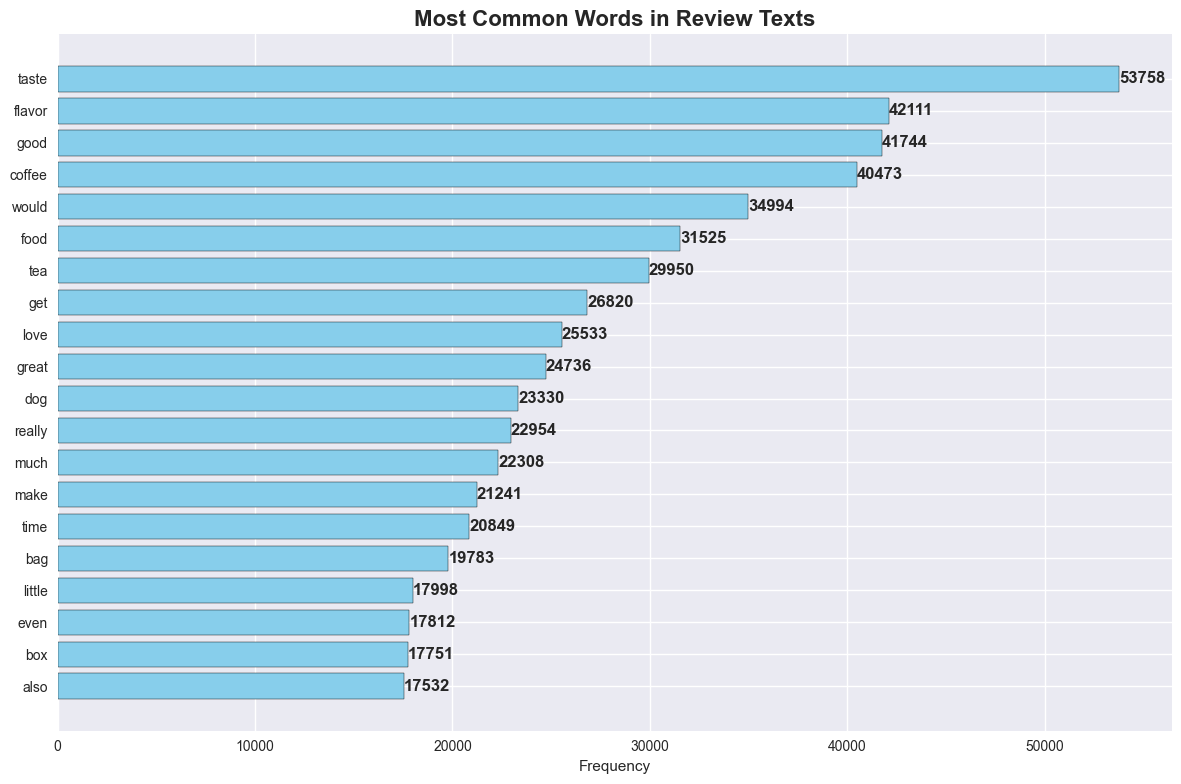

 Most Common Words in Summaries:


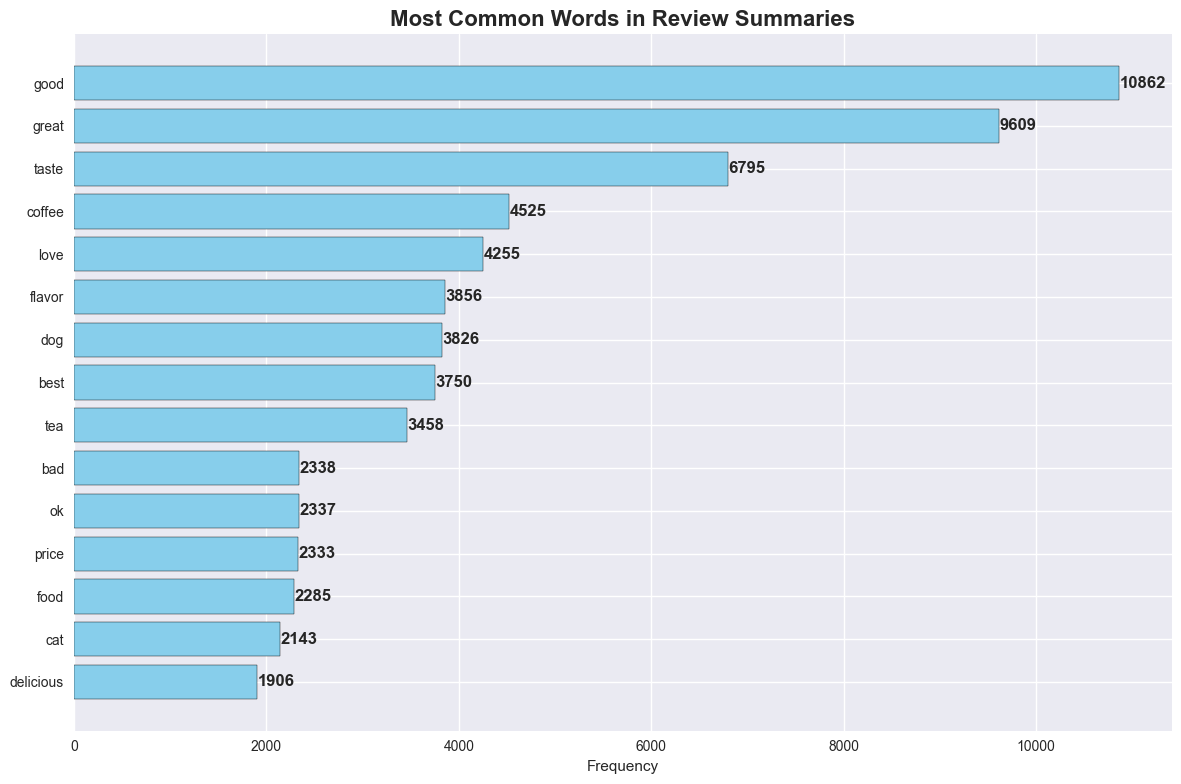


 Top 10 Most Common Words in Review Texts:
      word  frequency
16   taste      53758
6   flavor      42111
9     good      41744
3   coffee      40473
19   would      34994
7     food      31525
17     tea      29950
8      get      26820
12    love      25533
10   great      24736

 Top 10 Most Common Words in Summaries:
      word  frequency
8     good      10862
9    great       9609
13   taste       6795
3   coffee       4525
10    love       4255
6   flavor       3856
5      dog       3826
1     best       3750
14     tea       3458
0      bad       2338


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Setup stopwords
stop_words = set(stopwords.words('english'))
# Add additional unwanted words
additional_stops = ['br', 'product', 'amazon', 'buy', 'purchase', 'item', 'one', 'will', 'like']
stop_words.update(additional_stops)

# Function to extract most common words
def get_most_common_words(text_series, n_words=20, title="Most Common Words"):
    # Combine texts
    all_text = ' '.join(text_series.dropna().astype(str))
    
    # Use CountVectorizer
    vectorizer = CountVectorizer(stop_words=list(stop_words), 
                                max_features=n_words,
                                token_pattern=r'(?u)\b[A-Za-z]+\b')
    
    # Transform text to word matrix
    word_matrix = vectorizer.fit_transform([all_text])
    word_counts = word_matrix.toarray()[0]
    feature_names = vectorizer.get_feature_names_out()
    
    # Create DataFrame for words and frequencies
    word_freq = pd.DataFrame({
        'word': feature_names,
        'frequency': word_counts
    }).sort_values('frequency', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 8))
    bars = plt.barh(word_freq['word'][:n_words], word_freq['frequency'][:n_words], 
                    color='skyblue', edgecolor='black')
    
    plt.xlabel('Frequency')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add frequency labels
    for bar, freq in zip(bars, word_freq['frequency'][:n_words]):
        plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                f'{freq}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return word_freq

# Most common words in main text
print(" Most Common Words in Review Texts:")
common_text_words = get_most_common_words(df['Text'], 20, "Most Common Words in Review Texts")

# Most common words in summaries
print(" Most Common Words in Summaries:")
common_summary_words = get_most_common_words(df['Summary'], 15, "Most Common Words in Review Summaries")

# Display tables
print("\n Top 10 Most Common Words in Review Texts:")
print(common_text_words.head(10))

print("\n Top 10 Most Common Words in Summaries:")
print(common_summary_words.head(10))

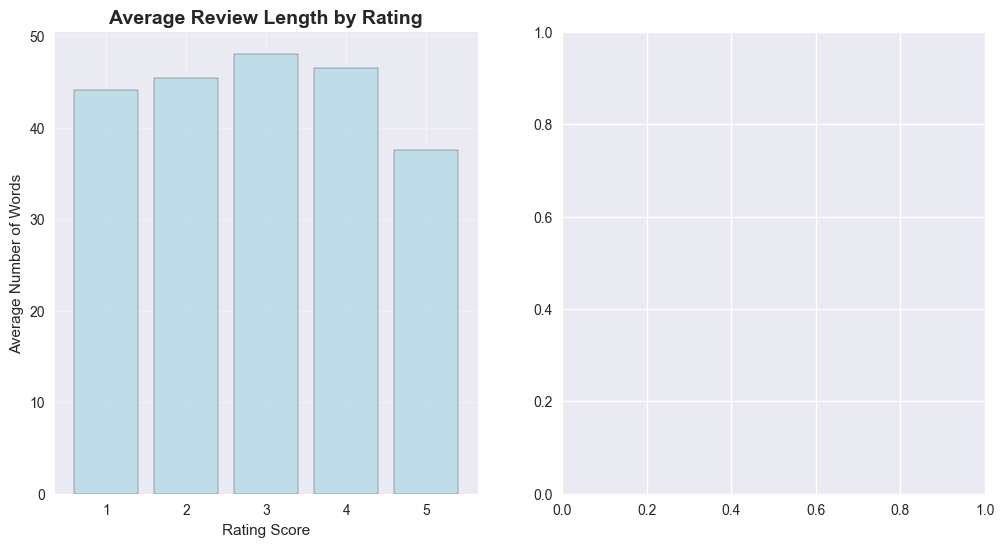

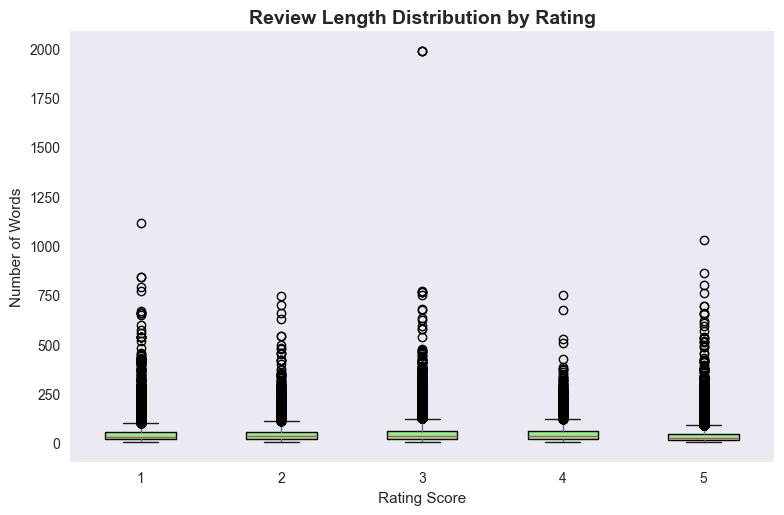

 Average Review Length by Rating:
 Rating 1: 44.1 words
 Rating 2: 45.4 words
 Rating 3: 48.1 words
 Rating 4: 46.5 words
 Rating 5: 37.6 words


In [15]:
# Relationship between review length and rating
plt.figure(figsize=(12, 6))

# Average review length per rating
avg_length_by_score = df.groupby('Score')['text_length'].mean()

plt.subplot(1, 2, 1)
plt.bar(avg_length_by_score.index, avg_length_by_score.values, 
        color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Average Review Length by Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating Score')
plt.ylabel('Average Number of Words')
plt.xticks(range(1, 6))
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
df.boxplot(column='text_length', by='Score', grid=False, 
           patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Review Length Distribution by Rating', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Rating Score')
plt.ylabel('Number of Words')

plt.tight_layout()
plt.show()

print(" Average Review Length by Rating:")
for score in sorted(df['Score'].unique()):
    avg_len = df[df['Score'] == score]['text_length'].mean()
    print(f" Rating {score}: {avg_len:.1f} words")
    